# Telco Customer Churn - Exploratory Data Analysis

Comprehensive EDA of the Telco Customer Churn dataset to identify key factors influencing churn.

**Contents:**
1. Setup & Data Loading
2. Dataset Overview
3. Target Variable Analysis
4. Demographic Analysis
5. Service Usage Analysis
6. Financial Analysis
7. Correlation Analysis
8. Key Insights

## 1. Setup & Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

# Professional styling
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'figure.figsize': [12, 6],
    'figure.dpi': 100,
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'axes.titleweight': 'bold'
})

# Color palette
COLORS = {
    'primary': '#2E86AB', 'secondary': '#A23B72', 'success': '#28A745',
    'danger': '#E63946', 'warning': '#F77F00', 'info': '#17A2B8'
}
churn_palette = {'No': COLORS['success'], 'Yes': COLORS['danger']}

print('Libraries loaded successfully')

Libraries loaded successfully


In [2]:
df = pd.read_csv('../data/teleco-customer-churn.csv')
print(f'Dataset: {df.shape[0]:,} rows x {df.shape[1]} columns')

Dataset: 7,043 rows x 21 columns


## 2. Dataset Overview

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe().round(2)

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


In [6]:
# Data cleaning
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f'Missing values: {df.isnull().sum().sum()}')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
print('Missing values imputed with median')

Missing values: 11
Missing values imputed with median


## 3. Target Variable Analysis

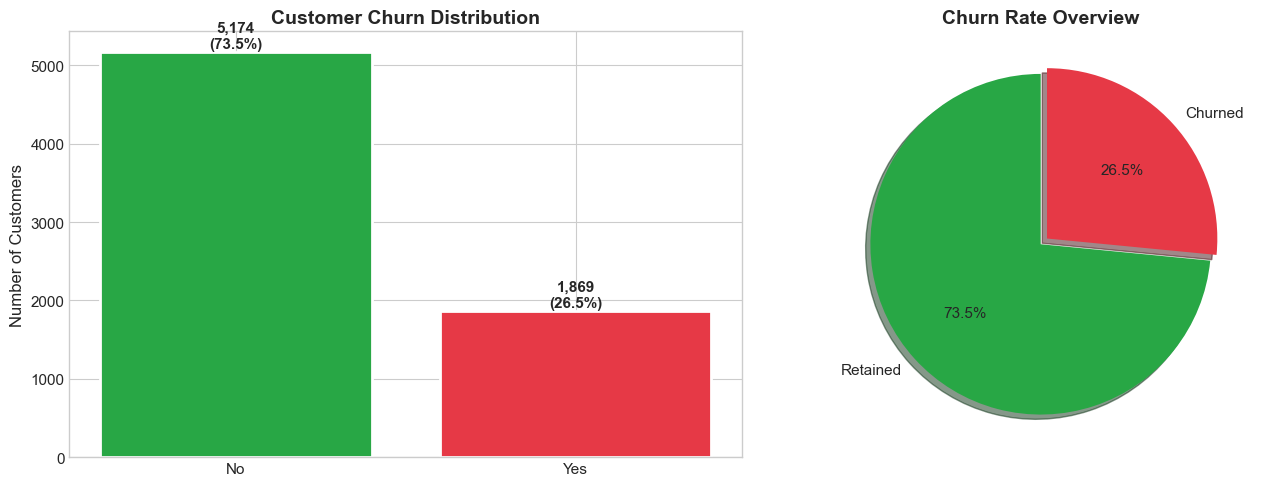

Churn Rate: 26.5%


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
churn_counts = df['Churn'].value_counts()
bars = axes[0].bar(churn_counts.index, churn_counts.values,
                   color=[churn_palette[x] for x in churn_counts.index],
                   edgecolor='white', linewidth=2)
axes[0].set_title('Customer Churn Distribution')
axes[0].set_ylabel('Number of Customers')
for bar, val in zip(bars, churn_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                 f'{val:,}\n({val/len(df)*100:.1f}%)', ha='center', fontweight='bold')

# Pie chart
axes[1].pie(churn_counts.values, labels=['Retained', 'Churned'],
            colors=[churn_palette['No'], churn_palette['Yes']],
            autopct='%1.1f%%', startangle=90, explode=(0, 0.05), shadow=True)
axes[1].set_title('Churn Rate Overview')

plt.tight_layout()
plt.show()
print(f'Churn Rate: {churn_counts["Yes"]/len(df)*100:.1f}%')

## 4. Demographic Analysis

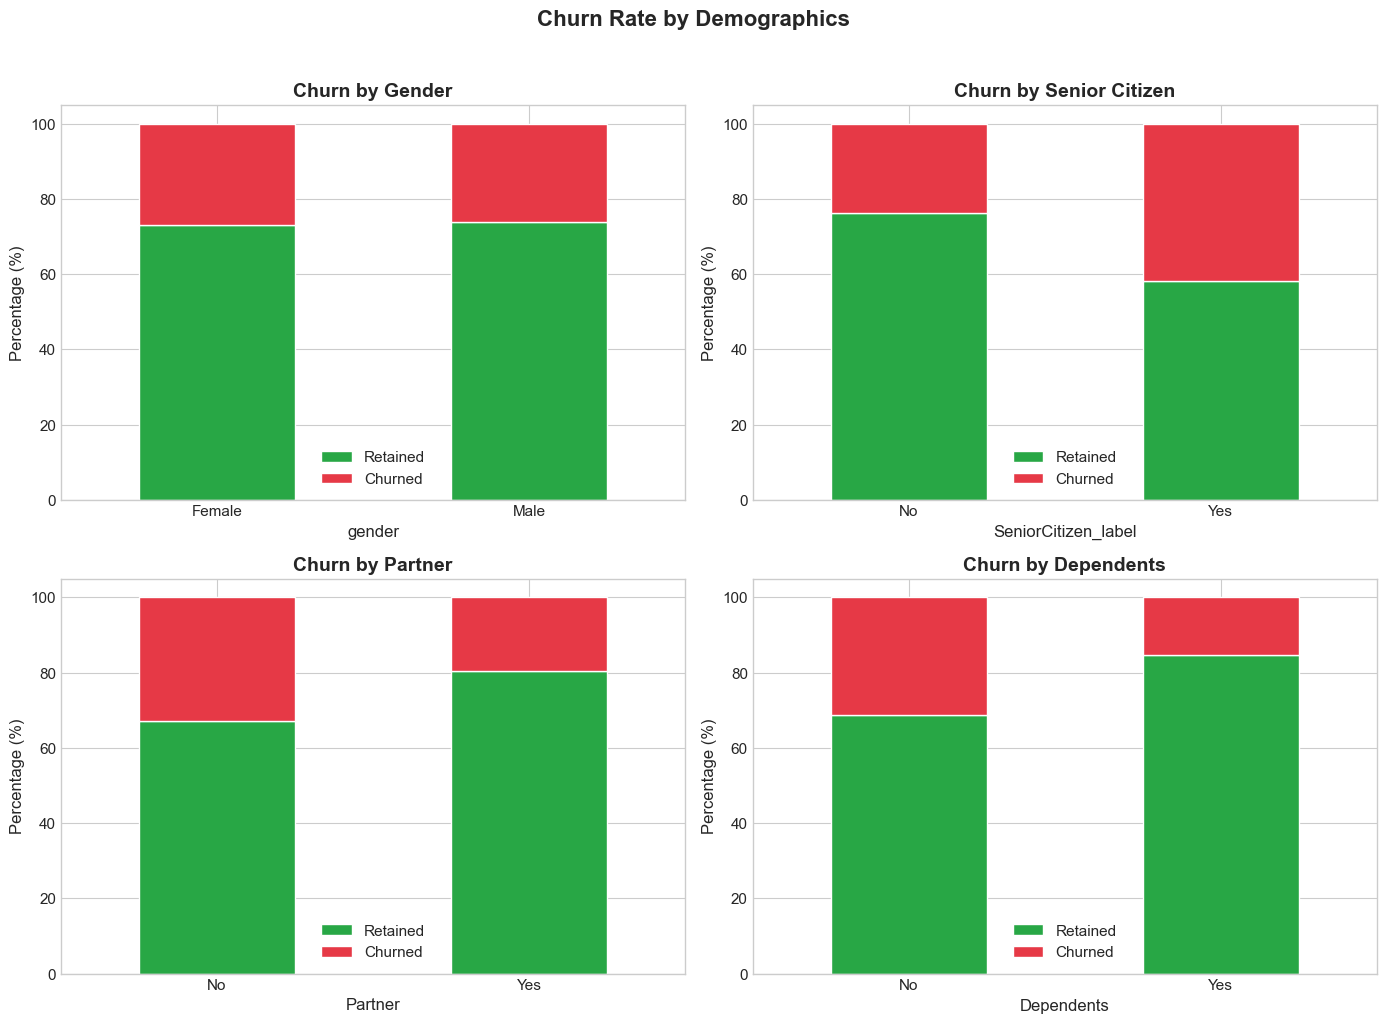

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
demographics = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
titles = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']

for idx, (feat, title) in enumerate(zip(demographics, titles)):
    ax = axes[idx//2, idx%2]
    if feat == 'SeniorCitizen':
        df['SeniorCitizen_label'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
        cross = pd.crosstab(df['SeniorCitizen_label'], df['Churn'], normalize='index') * 100
    else:
        cross = pd.crosstab(df[feat], df['Churn'], normalize='index') * 100
    
    cross.plot(kind='bar', stacked=True, ax=ax,
               color=[churn_palette['No'], churn_palette['Yes']], edgecolor='white')
    ax.set_title(f'Churn by {title}')
    ax.set_ylabel('Percentage (%)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.legend(['Retained', 'Churned'])

plt.suptitle('Churn Rate by Demographics', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

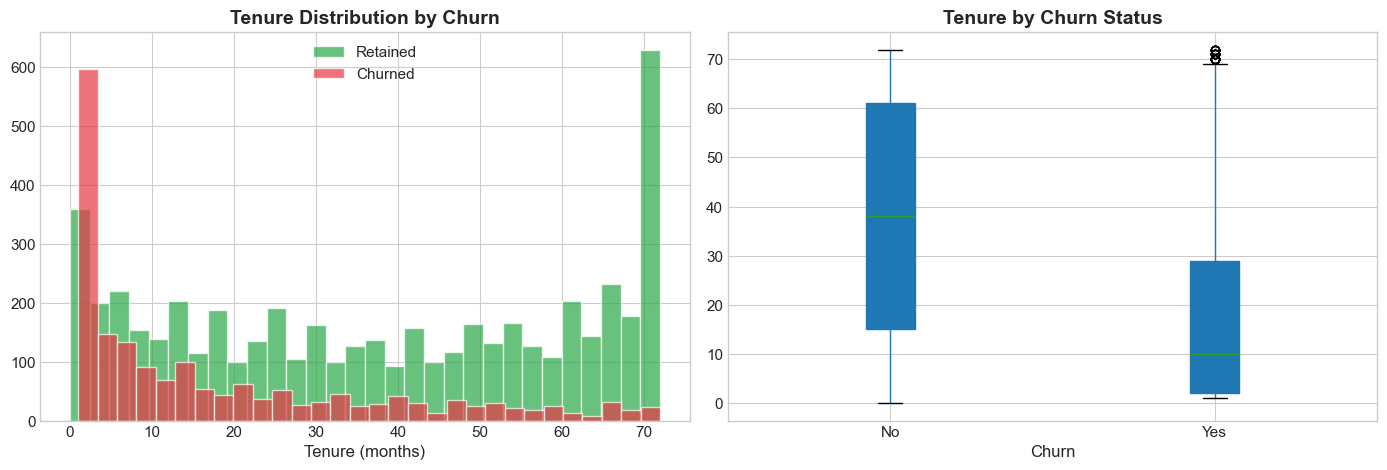

        count   mean    std  min   25%   50%   75%   max
Churn                                                   
No     5174.0  37.57  24.11  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0


In [9]:
# Tenure analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for status in ['No', 'Yes']:
    axes[0].hist(df[df['Churn'] == status]['tenure'], bins=30, alpha=0.7,
                 color=churn_palette[status], label=status, edgecolor='white')
axes[0].set_title('Tenure Distribution by Churn')
axes[0].set_xlabel('Tenure (months)')
axes[0].legend(['Retained', 'Churned'])

df.boxplot(column='tenure', by='Churn', ax=axes[1], patch_artist=True)
axes[1].set_title('Tenure by Churn Status')
plt.suptitle('')
plt.tight_layout()
plt.show()

print(df.groupby('Churn')['tenure'].describe().round(2))

## 5. Service Usage Analysis

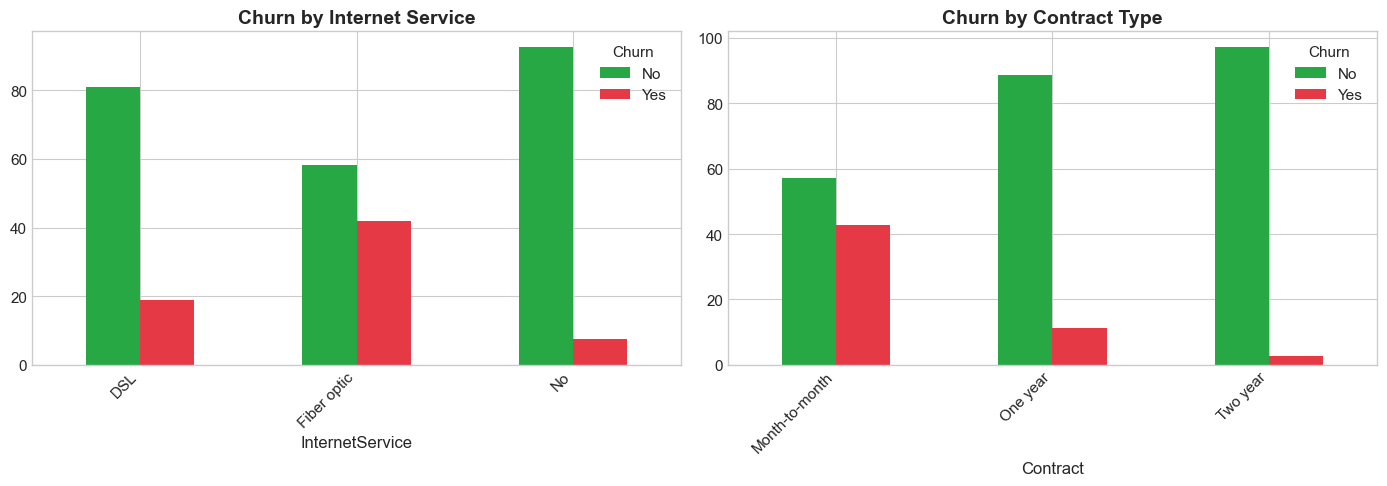

Key: Fiber optic ~42% churn, Month-to-month ~42% vs Two year ~3%


In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Internet Service
pd.crosstab(df['InternetService'], df['Churn'], normalize='index').mul(100).plot(
    kind='bar', ax=axes[0], color=[churn_palette['No'], churn_palette['Yes']])
axes[0].set_title('Churn by Internet Service')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Contract
pd.crosstab(df['Contract'], df['Churn'], normalize='index').mul(100).plot(
    kind='bar', ax=axes[1], color=[churn_palette['No'], churn_palette['Yes']])
axes[1].set_title('Churn by Contract Type')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()
print('Key: Fiber optic ~42% churn, Month-to-month ~42% vs Two year ~3%')

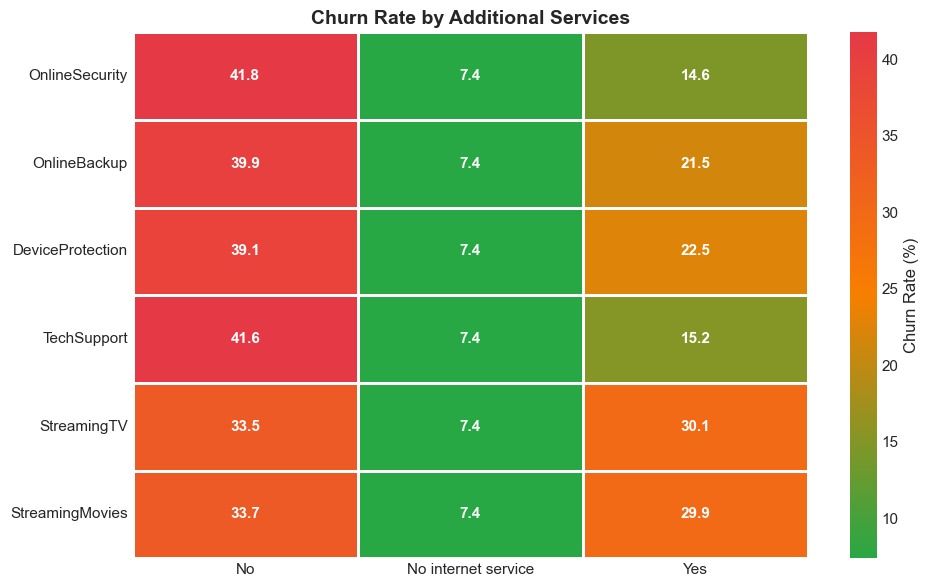

In [11]:
# Services heatmap
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies']

churn_rates = {}
for svc in services:
    churn_rates[svc] = df.groupby(svc)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)

churn_df = pd.DataFrame(churn_rates).T
cmap = LinearSegmentedColormap.from_list('custom', [COLORS['success'], COLORS['warning'], COLORS['danger']])

plt.figure(figsize=(10, 6))
sns.heatmap(churn_df, annot=True, fmt='.1f', cmap=cmap, linewidths=2,
            cbar_kws={'label': 'Churn Rate (%)'}, annot_kws={'weight': 'bold'})
plt.title('Churn Rate by Additional Services', fontweight='bold')
plt.tight_layout()
plt.show()

## 6. Financial Analysis

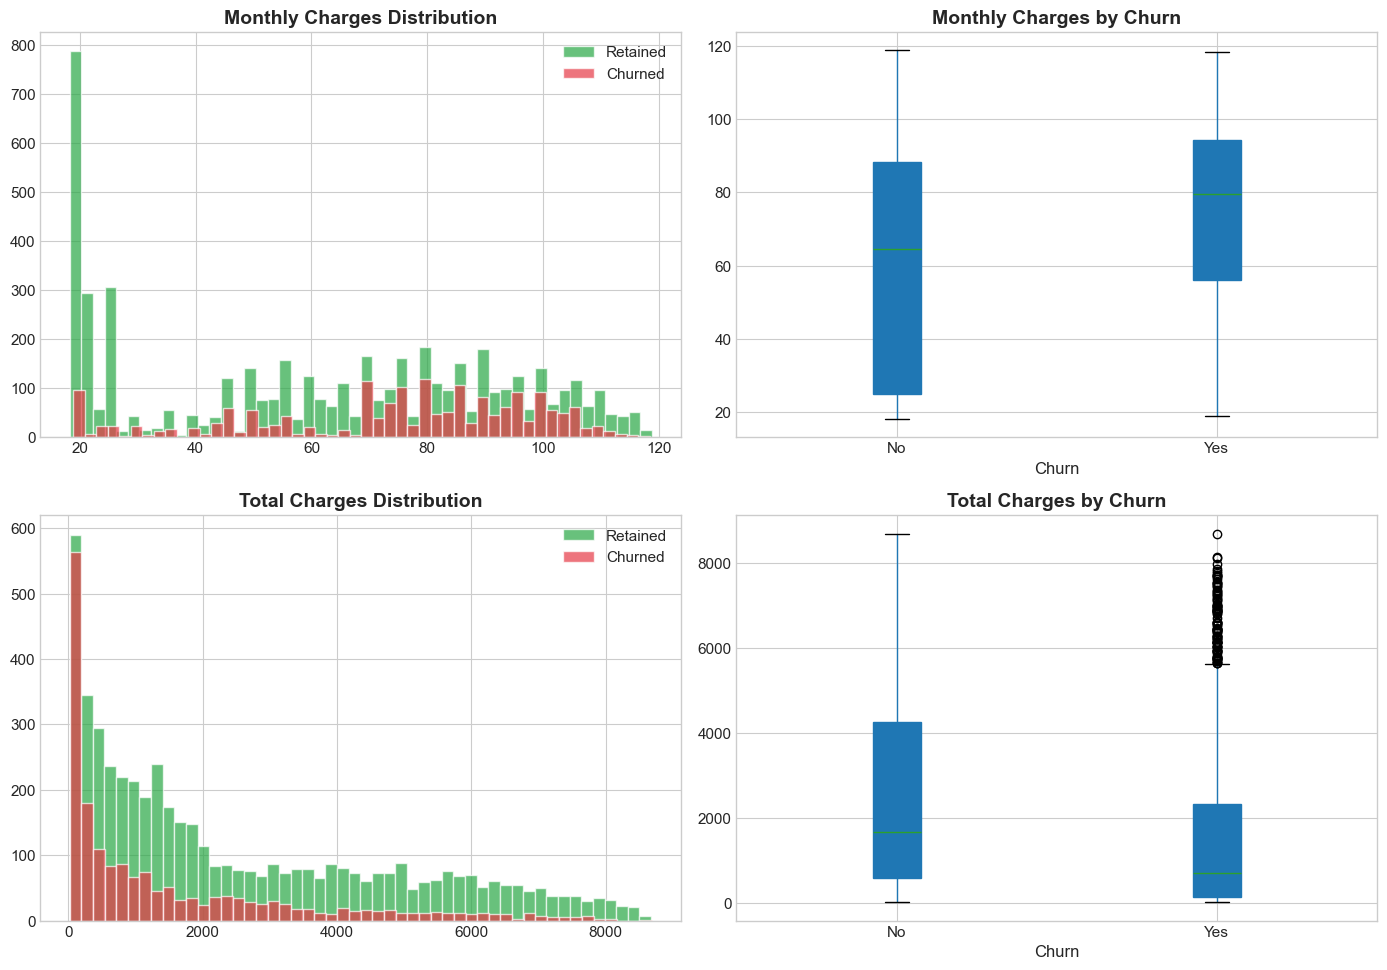

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Monthly Charges
for status in ['No', 'Yes']:
    axes[0,0].hist(df[df['Churn']==status]['MonthlyCharges'], bins=50, alpha=0.7,
                   color=churn_palette[status], edgecolor='white')
axes[0,0].set_title('Monthly Charges Distribution')
axes[0,0].legend(['Retained', 'Churned'])

df.boxplot(column='MonthlyCharges', by='Churn', ax=axes[0,1], patch_artist=True)
axes[0,1].set_title('Monthly Charges by Churn')
plt.suptitle('')

# Total Charges
for status in ['No', 'Yes']:
    axes[1,0].hist(df[df['Churn']==status]['TotalCharges'], bins=50, alpha=0.7,
                   color=churn_palette[status], edgecolor='white')
axes[1,0].set_title('Total Charges Distribution')
axes[1,0].legend(['Retained', 'Churned'])

df.boxplot(column='TotalCharges', by='Churn', ax=axes[1,1], patch_artist=True)
axes[1,1].set_title('Total Charges by Churn')
plt.suptitle('')

plt.tight_layout()
plt.show()

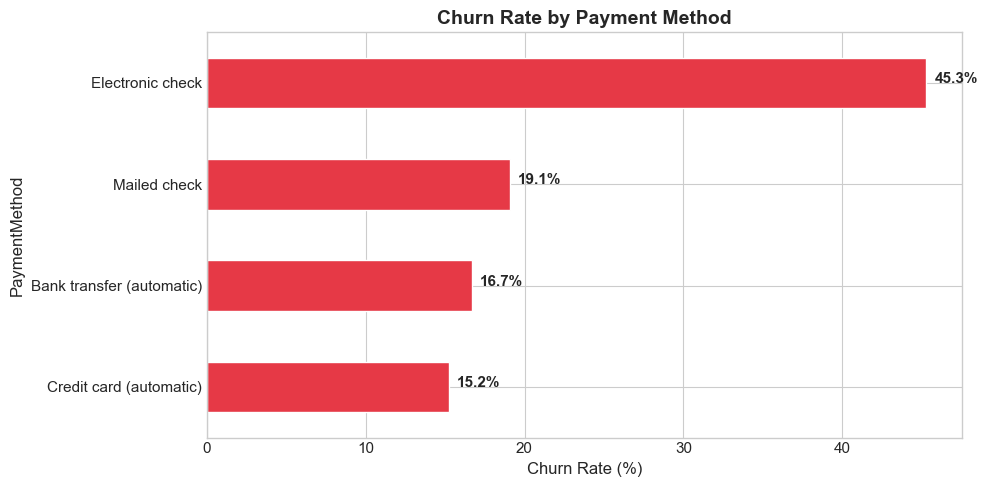

Electronic check has highest churn rate (~45%)


In [13]:
# Payment method
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100

plt.figure(figsize=(10, 5))
payment_churn['Yes'].sort_values().plot(kind='barh', color=COLORS['danger'], edgecolor='white')
plt.title('Churn Rate by Payment Method', fontweight='bold')
plt.xlabel('Churn Rate (%)')
for i, v in enumerate(payment_churn['Yes'].sort_values()):
    plt.text(v + 0.5, i, f'{v:.1f}%', fontweight='bold')
plt.tight_layout()
plt.show()
print('Electronic check has highest churn rate (~45%)')

## 7. Correlation Analysis

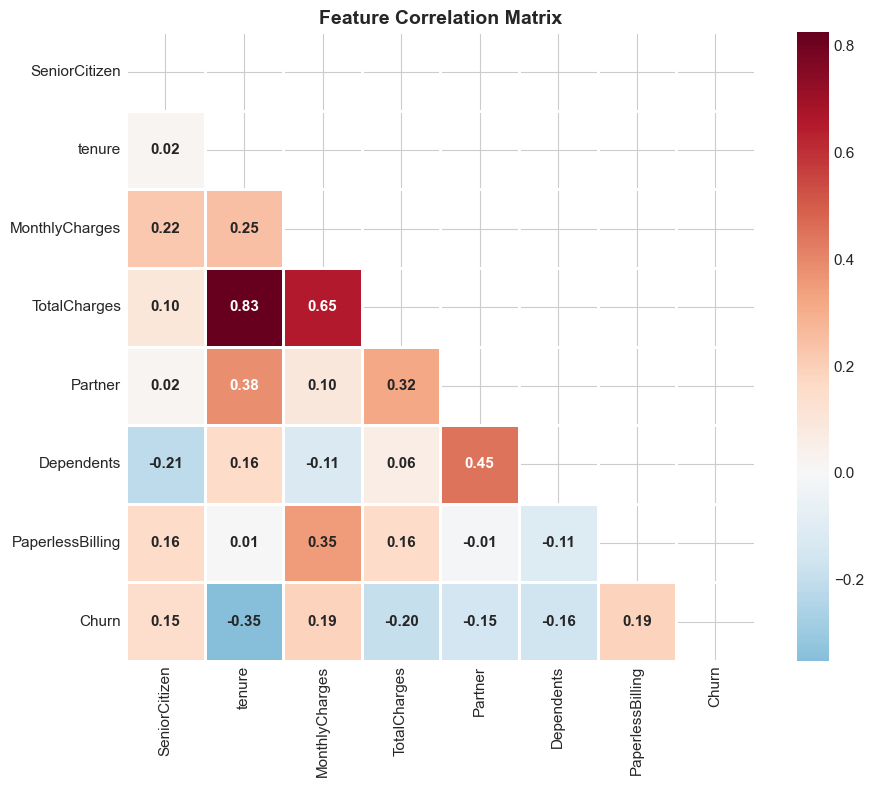


Top Churn Correlations:
tenure             -0.352229
TotalCharges       -0.199037
MonthlyCharges      0.193356
PaperlessBilling    0.191825
Dependents         -0.164221
SeniorCitizen       0.150889
Partner            -0.150448
Name: Churn, dtype: float64


In [14]:
# Encode for correlation
df_enc = df.copy()
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']:
    df_enc[col] = df_enc[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

numeric = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
           'Partner', 'Dependents', 'PaperlessBilling', 'Churn']
corr = df_enc[numeric].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='RdBu_r', center=0, annot=True, fmt='.2f',
            square=True, linewidths=2, annot_kws={'weight': 'bold'})
plt.title('Feature Correlation Matrix', fontweight='bold')
plt.tight_layout()
plt.show()

print('\nTop Churn Correlations:')
print(corr['Churn'].drop('Churn').sort_values(key=abs, ascending=False))

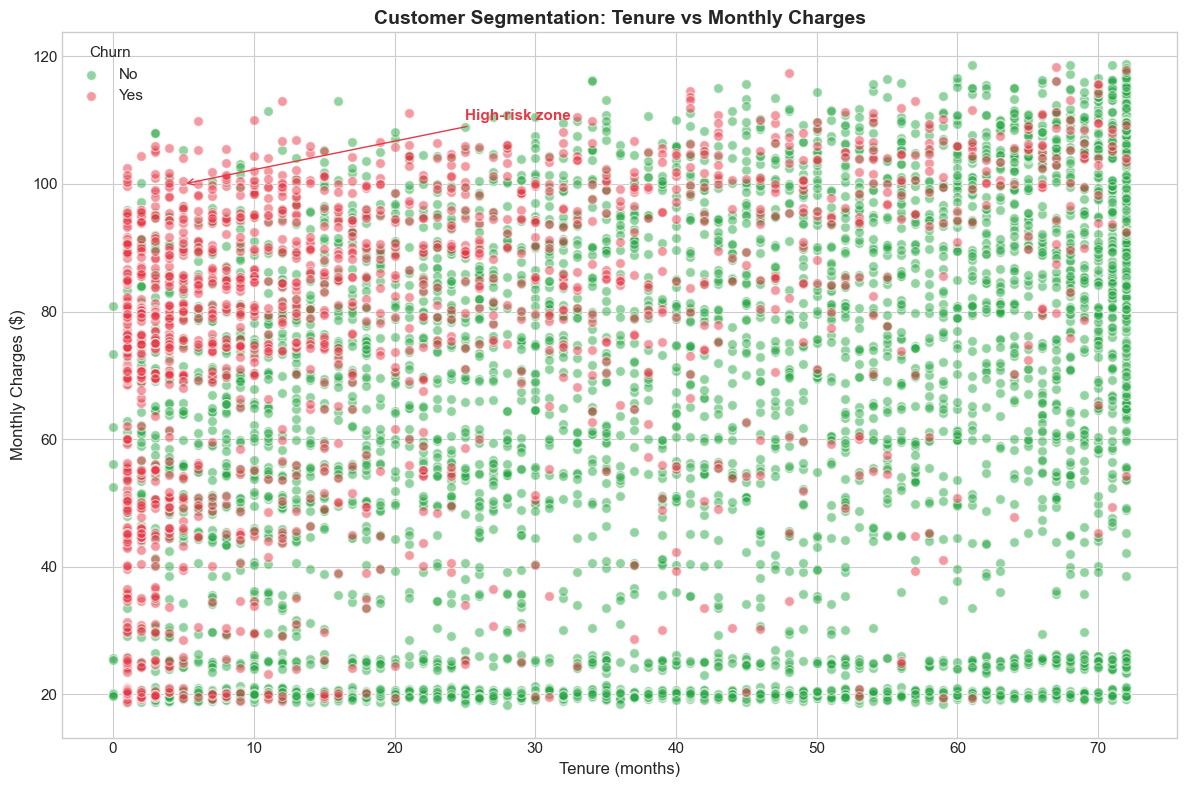

In [15]:
# Scatter: Tenure vs Monthly Charges
plt.figure(figsize=(12, 8))
for status in ['No', 'Yes']:
    subset = df[df['Churn'] == status]
    plt.scatter(subset['tenure'], subset['MonthlyCharges'],
                c=churn_palette[status], alpha=0.5, s=50, label=status, edgecolors='white')

plt.title('Customer Segmentation: Tenure vs Monthly Charges', fontweight='bold')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Churn')
plt.annotate('High-risk zone', xy=(5, 100), xytext=(25, 110),
             fontweight='bold', color=COLORS['danger'],
             arrowprops=dict(arrowstyle='->', color=COLORS['danger']))
plt.tight_layout()
plt.show()

## 8. Key Insights Summary

In [16]:
print('=' * 60)
print('           KEY INSIGHTS SUMMARY')
print('=' * 60)
print(f'\nChurn Rate: {(df["Churn"]=="Yes").mean()*100:.1f}%')
print(f'Total Customers: {len(df):,}')
print(f'Churned: {(df["Churn"]=="Yes").sum():,}')

print('\nHIGH-RISK FACTORS:')
print('  - Month-to-month contracts: ~42% churn')
print('  - Fiber optic internet: ~42% churn')
print('  - Electronic check payment: ~45% churn')
print('  - No security/tech support: Higher churn')
print('  - Short tenure (<12 months): Higher risk')

print('\nRETENTION FACTORS:')
print('  - 2-year contracts: ~3% churn')
print('  - Tech support/security add-ons: Lower churn')
print('  - Longer tenure: Lower churn')

print('\nRECOMMENDATIONS:')
print('  1. Target month-to-month for contract upgrades')
print('  2. Promote security/support add-ons')
print('  3. Focus retention on first 12 months')
print('  4. Review fiber optic pricing')
print('  5. Incentivize automatic payments')
print('=' * 60)

           KEY INSIGHTS SUMMARY

Churn Rate: 26.5%
Total Customers: 7,043
Churned: 1,869

HIGH-RISK FACTORS:
  - Month-to-month contracts: ~42% churn
  - Fiber optic internet: ~42% churn
  - Electronic check payment: ~45% churn
  - No security/tech support: Higher churn
  - Short tenure (<12 months): Higher risk

RETENTION FACTORS:
  - 2-year contracts: ~3% churn
  - Tech support/security add-ons: Lower churn
  - Longer tenure: Lower churn

RECOMMENDATIONS:
  1. Target month-to-month for contract upgrades
  2. Promote security/support add-ons
  3. Focus retention on first 12 months
  4. Review fiber optic pricing
  5. Incentivize automatic payments


In [17]:
# Save cleaned data
df.to_csv('../data/teleco-customer-churn-cleaned.csv', index=False)
print('Cleaned dataset saved')

Cleaned dataset saved
